### Single layer NN with softmax

In [55]:
import torch
import matplotlib.pyplot as plt

In [56]:
words = open("names.txt", "r").read().splitlines()

In [57]:
chars = sorted(list(set("".join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi["."] = 0
itos = {i:s for s,i in stoi.items()}

In [58]:
xs, ys = [], []
for word in words[:3]:
    characters = ["."] + list(word) + ["."]
    for ch1, ch2 in zip(characters, characters[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples = ", num)

number of examples =  16


In [59]:
# input to nn has to be float
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

In [60]:
xenc.shape

torch.Size([16, 27])

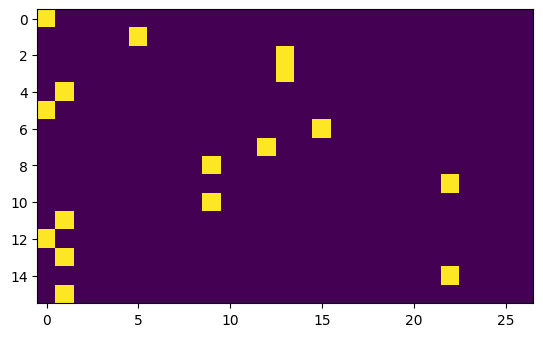

In [61]:
plt.imshow(xenc)

In [62]:
xs

tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1])

In [63]:
ys

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0])

In [71]:
xs, ys = [], []
for word in words:
    characters = ["."] + list(word) + ["."]
    for ch1, ch2 in zip(characters, characters[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples = ", num)

number of examples =  228146


In [72]:
# initializing 27 neurons with each 27 inputs and therefore 27 weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=g, requires_grad=True)

In [75]:
# gradient descent:
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    log_counts = xenc @ W
    counts = log_counts.exp() # Is the N matrix
    probs = counts / counts.sum(1, keepdims=True) # probs for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean() # second part is smoothing
    # Softmax
    print(loss.item())

    # backward pass
    W.grad = None
    loss.backward()

    # update
    W.data += -50 * W.grad

2.4834258556365967
2.4833855628967285
2.4833483695983887
2.4833130836486816
2.4832797050476074
2.483247756958008
2.4832165241241455
2.483186960220337
2.4831581115722656
2.4831299781799316
2.483103036880493
2.483076333999634
2.48305082321167
2.4830260276794434
2.483001708984375
2.4829773902893066
2.482954263687134
2.48293137550354
2.4829094409942627
2.4828872680664062
2.482865571975708
2.4828450679779053
2.4828243255615234
2.4828040599823
2.4827845096588135
2.482764959335327
2.48274564743042
2.48272705078125
2.482708215713501
2.4826903343200684
2.4826724529266357
2.4826550483703613
2.482637405395508
2.4826204776763916
2.4826037883758545
2.4825873374938965
2.4825706481933594
2.4825549125671387
2.482538938522339
2.482523202896118
2.4825077056884766
2.482492446899414
2.4824774265289307
2.4824626445770264
2.482448101043701
2.482433557510376
2.48241925239563
2.4824047088623047
2.482390880584717
2.482377290725708
2.482363700866699
2.4823501110076904
2.4823367595672607
2.48232364654541
2.48231

In [43]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()
log_counts = xenc @ W
counts = log_counts.exp() # Is the N matrix
probs = counts / counts.sum(1, keepdims=True) # probs for next character
loss = -probs[torch.arange(5), ys].log().mean()
# Softmax

In [78]:
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        log_counts = xenc @ W
        counts = log_counts.exp() # Is the N matrix
        p = counts / counts.sum(1, keepdims=True) # probs for next character
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print("".join(out))

mor
axx
minaymoryles
kondlaisah
anchthizarie
odaren
iaddash
h
jionatien
egvonn
